In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../Data/gdp_percapita.csv')

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


5. How many rows and columns are in gdp_d ? 7662 rows × 4 columns. What are the data types of each column? 

 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


6. Drop the 'Value Footnotes' column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = gdp_df.rename(columns={'Value':'GDP_Per_Capita','Country or Area':"Country"})

In [6]:
gdp_df

,Country,Year,GDP_Per_Capita,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [7]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [8]:
unique_years = gdp_df["Year"].nunique()
print(unique_years)

33


In [9]:
country_years = gdp_df.groupby(["Country"])["Year"].count()
print(country_years)

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [10]:
country_count_all = gdp_df.groupby("Country").filter(lambda x: x.Year.count()== unique_years)
print(country_count_all["Country"].nunique())

202


In [11]:
country_count_missing = gdp_df.groupby("Country").filter(lambda x: x.Year.count()!= unique_years)
country_unique = country_count_missing.groupby(["Country"])#.nunique()
print(country_unique["Country"].nunique())

Country
Afghanistan                  1
Aruba                        1
Bhutan                       1
Bosnia and Herzegovina       1
Cambodia                     1
Cayman Islands               1
Croatia                      1
CuraÃ§ao                     1
Djibouti                     1
Estonia                      1
Hungary                      1
Iceland                      1
Israel                       1
Kosovo                       1
Kuwait                       1
Latvia                       1
Lebanon                      1
Liberia                      1
Libya                        1
Lithuania                    1
Maldives                     1
Moldova                      1
Montenegro                   1
Nauru                        1
Other small states           1
Palau                        1
Qatar                        1
San Marino                   1
Serbia                       1
Sint Maarten (Dutch part)    1
Slovak Republic              1
Slovenia                     1


8.In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

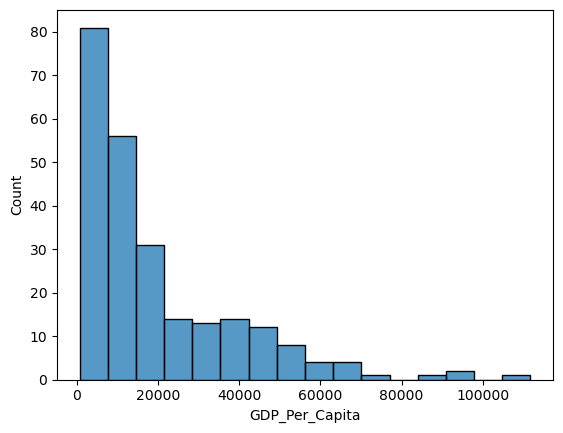

In [12]:
df_year_2020_hist = gdp_df.loc[gdp_df["Year"]==2020]
hist = sns.histplot(df_year_2020_hist,x = "GDP_Per_Capita")

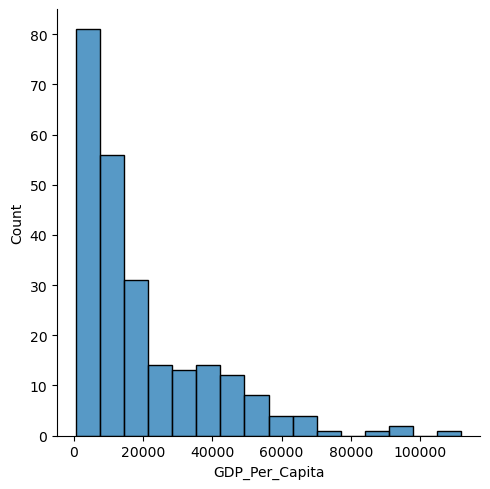

In [13]:
df_year_2020_dist = gdp_df.loc[gdp_df["Year"]==2020]
dist = sns.displot(df_year_2020_dist,x = "GDP_Per_Capita")

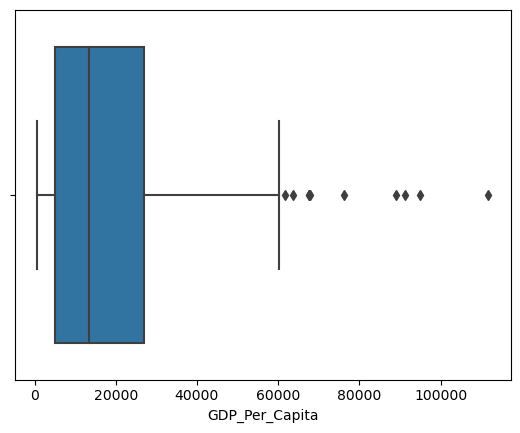

In [14]:
df_year_2020_box = gdp_df.loc[gdp_df["Year"]==2020]
boxplt = sns.boxplot(df_year_2020_box,x = "GDP_Per_Capita")

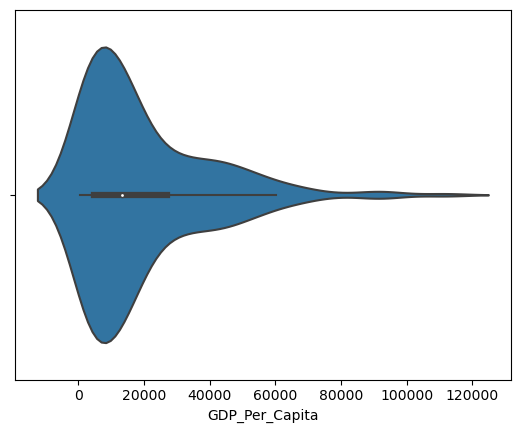

In [15]:
df_year_2020_violin = gdp_df.loc[gdp_df["Year"]==2020]
violinplt = sns.violinplot(df_year_2020_violin,x = "GDP_Per_Capita")

9.What was the median GDP per capita value in 2020?

In [16]:
median_gdp = gdp_df.loc[gdp_df["Year"]==2020]
print(round(median_gdp.GDP_Per_Capita.median(),2))

13358.0


10.For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

A boxplot
A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
A scatterplot
A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

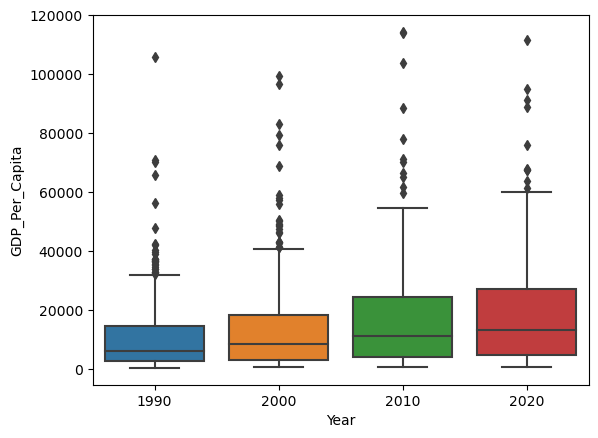

In [17]:
gdp_decades = gdp_df.loc[gdp_df["Year"].isin([1990,2000,2010,2020])]
#print(Box_Plot_year )
sns.boxplot(data = gdp_decades, x = "Year", y = "GDP_Per_Capita")
plt.show()

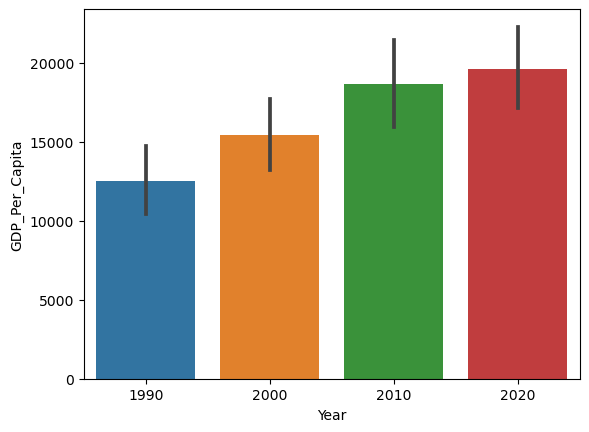

In [18]:
sns.barplot(data = gdp_decades, x = "Year", y = "GDP_Per_Capita")
plt.show()

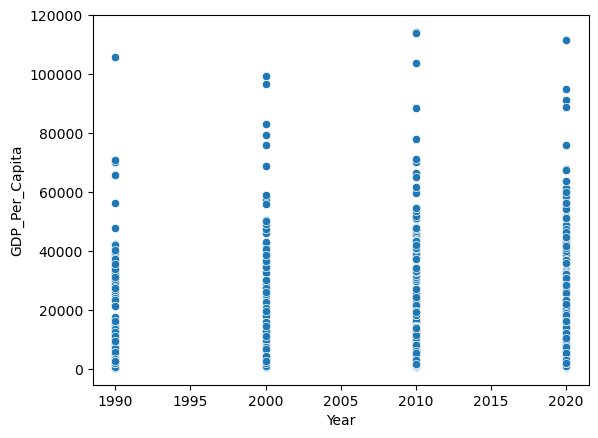

In [19]:
sns.scatterplot(data = gdp_decades, x = "Year", y = "GDP_Per_Capita")
plt.show()

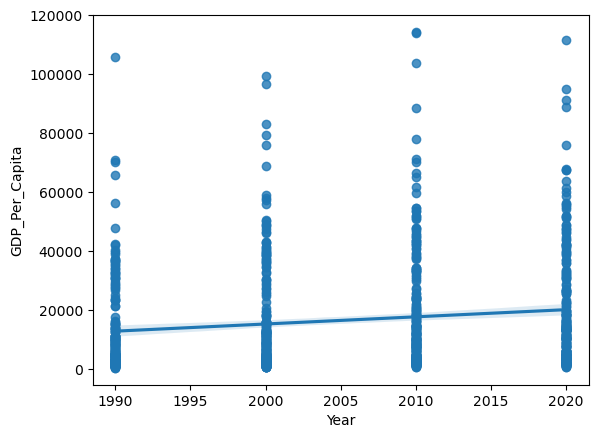

In [20]:
sns.regplot(data = gdp_decades, x = "Year", y = "GDP_Per_Capita")
plt.show()

11.Which country was the first to have a GDP per capita greater than $ 100,000?

In [21]:
first_gdp = gdp_df.loc[gdp_df["GDP_Per_Capita"]>=100000]
first_gdp_minyr = first_gdp["Year"].min()
first_gdp_hundredk = first_gdp.loc[first_gdp["Year"]==first_gdp_minyr]
print(first_gdp_hundredk)

                   Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990   105893.626059


12.Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [22]:
gdp_largest_2020 = gdp_df.loc[gdp_df["Year"]==2020]
country_GDP_largest_2020 = gdp_largest_2020.nlargest(1,"GDP_Per_Capita")
print(country_GDP_largest_2020)

         Country  Year  GDP_Per_Capita
4148  Luxembourg  2020   111751.314751


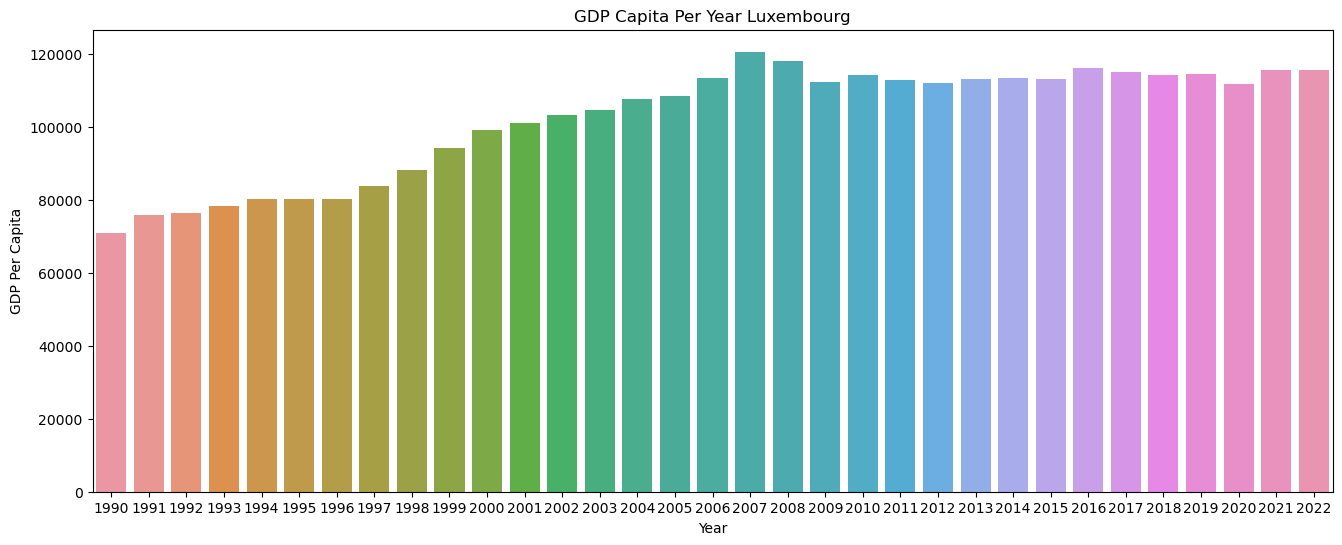

In [23]:
Luxembourg_plot = gdp_df.loc[gdp_df["Country"] == "Luxembourg"]

fig,ax = plt.subplots(figsize = (16,6))  
sns.barplot(
data = Luxembourg_plot,
x = "Year",
y = "GDP_Per_Capita")
plt.xlabel("Year")   
plt.ylabel('GDP Per Capita')
plt.title('GDP Capita Per Year Luxembourg');
plt.show()

13.Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [24]:
gdp_min_2020 = gdp_df.loc[gdp_df["Year"]==2020]
country_GDP_smallest_2020 = gdp_min_2020.nsmallest(1,"GDP_Per_Capita")
print(country_GDP_smallest_2020)

     Country  Year  GDP_Per_Capita
973  Burundi  2020      711.355263


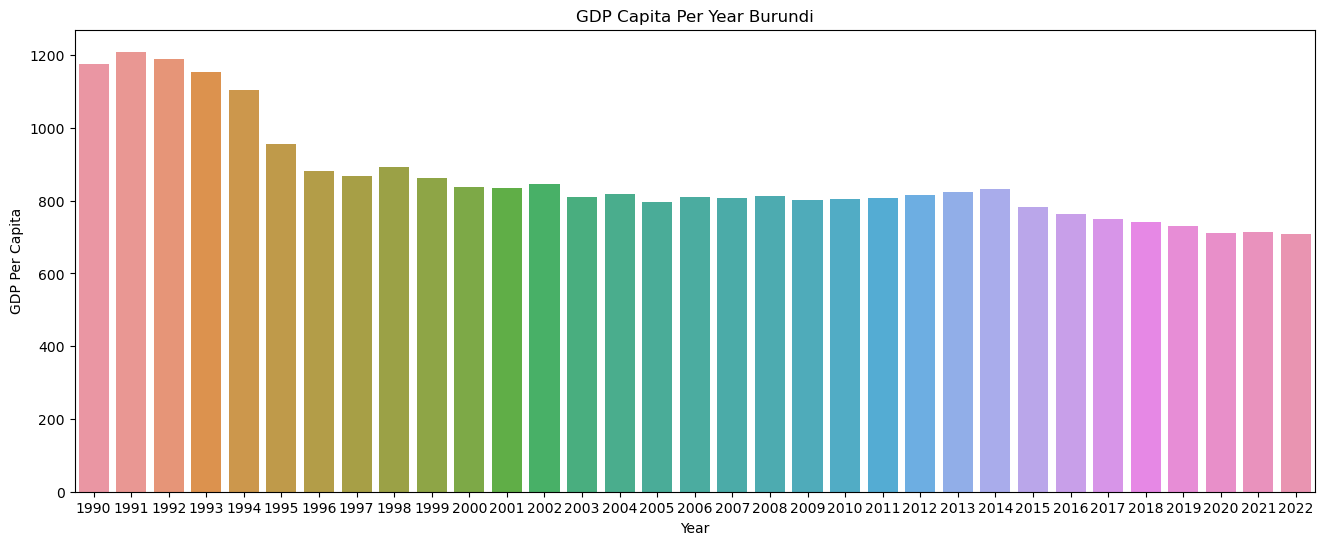

In [25]:
Burundi_plot = gdp_df.loc[gdp_df["Country"] == "Burundi"]

fig,ax = plt.subplots(figsize = (16,6))  
sns.barplot(
data = Burundi_plot,
x = "Year",
y = "GDP_Per_Capita")
plt.xlabel("Year")   
plt.ylabel('GDP Per Capita')
plt.title('GDP Capita Per Year Burundi');
plt.show()

14.Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [ ]:
internet_df = pd.read_csv('../Data/internet_use.csv')

In [28]:
internet_df = pd.read_csv("../data/internet_use.csv", skiprows=0, nrows = 4495)

In [29]:
internet_df 

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


15.Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.